Naive Bayes Classifier

Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 2: Load the dataset

In [2]:
data = sns.load_dataset('iris')

print(data.head())

X= data.drop("species",axis=1)
y = data["species"]

#Encode categorical target
encoder = LabelEncoder()
y = encoder.fit_transform(y)    #setosa = 0, vesicolor = 1, viginica = 2

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 3 : Train test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42, stratify = y
)

Step 4: Build pipeline (scaling -> polynomial -> PCA ->NB)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)),
    ('pca', PCA(n_components = 2)),        #reduce to 2D for visiualization & noise reduction
    ('nb', GaussianNB())                                            
])

Step 5: Train & Evaluation of the model

In [5]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('\nTest Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred,target_names = encoder.classes_))
print('\nConfusion Matrix:\n', confusion_matrix(y_test,y_pred))


Test Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.73      0.80      0.76        10
   virginica       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


Confusion Matrix:
 [[10  0  0]
 [ 0  8  2]
 [ 0  3  7]]


Step 6 : Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(pipe,X,y, cv = cv, scoring = 'accuracy')
print('\nCross-validation Accuracy Scores:',cv_scores)
print('Mean CV Accuracy:', np.mean(cv_scores))


Cross-validation Accuracy Scores: [0.93333333 0.76666667 0.76666667 0.96666667 0.76666667]
Mean CV Accuracy: 0.8400000000000001


Step 7 ; Visualization (Decision Regions using PCA Space)

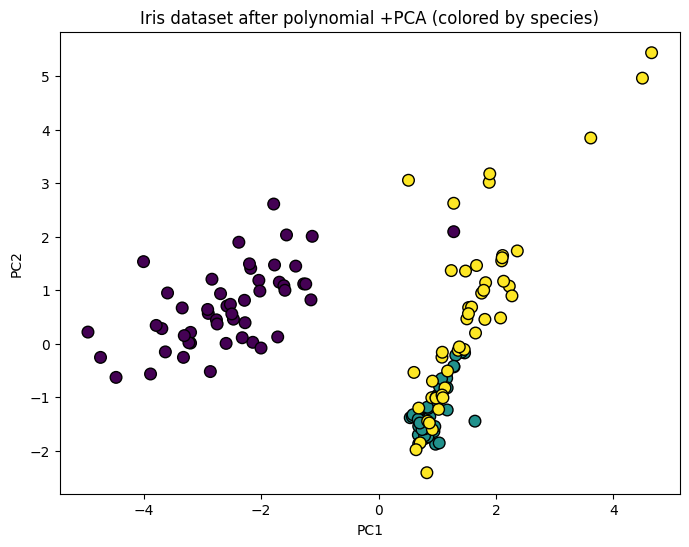

In [7]:
X_vis = pipe.named_steps['pca'].transform(
    pipe.named_steps['poly'].transform(pipe.named_steps['scaler'].transform(X))
)

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=y, cmap = 'viridis', edgecolor ='k',s=70)
plt.title('Iris dataset after polynomial +PCA (colored by species)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()